<a href="https://colab.research.google.com/github/CE605A/Mriganka-Shekhar-Barman_231030038/blob/main/Mriganka_605A_231030038_A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

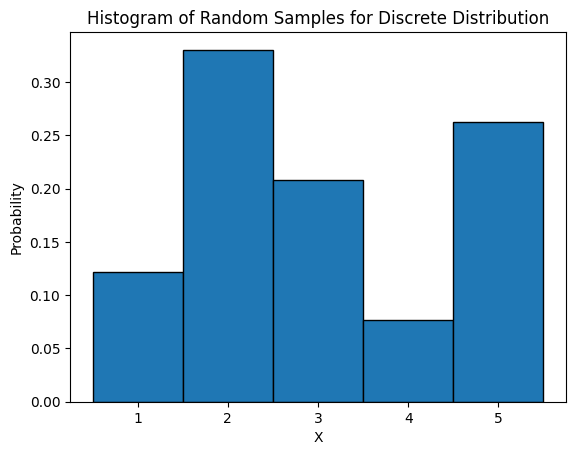

In [ ]:
# Question 1.a)
import numpy as np
import matplotlib.pyplot as plt

# Given probability mass function (pmf) for a discrete random variable X
X_values = np.array([1, 2, 3, 4, 5, 6])
pmf = np.array([0.1, 0.3, 0.2, 0.1, 0.2, 0.1])

# Generate 500 random samples using inverse transform method
n_samples = 500
cumulative_pmf = np.cumsum(pmf)
uniform_samples = np.random.rand(n_samples)
discrete_samples = np.searchsorted(cumulative_pmf, uniform_samples) + 1

# Plot histogram
plt.hist(discrete_samples, bins=X_values - 0.5, edgecolor='black', density=True)
plt.title('Histogram of Random Samples for Discrete Distribution')
plt.xlabel('X')
plt.ylabel('Probability')
plt.show()


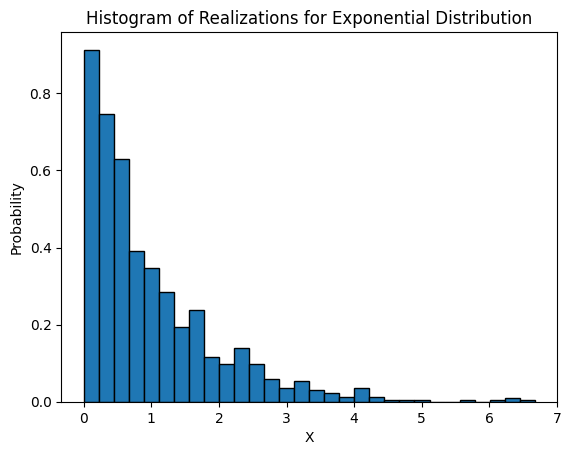

In [ ]:
# Question 1.b)
import numpy as np
import matplotlib.pyplot as plt

# Given parameter for the exponential distribution
lambda_val = 1

# Inverse CDF function for exponential distribution
def inverse_cdf_exp(u):
    return -np.log(1 - u) / lambda_val

# Generate 1000 realizations using inverse transform method
n_realizations = 1000
uniform_samples_exp = np.random.rand(n_realizations)
continuous_samples_exp = inverse_cdf_exp(uniform_samples_exp)

# Plot histogram
plt.hist(continuous_samples_exp, bins=30, edgecolor='black', density=True)
plt.title('Histogram of Realizations for Exponential Distribution')
plt.xlabel('X')
plt.ylabel('Probability')
plt.show()


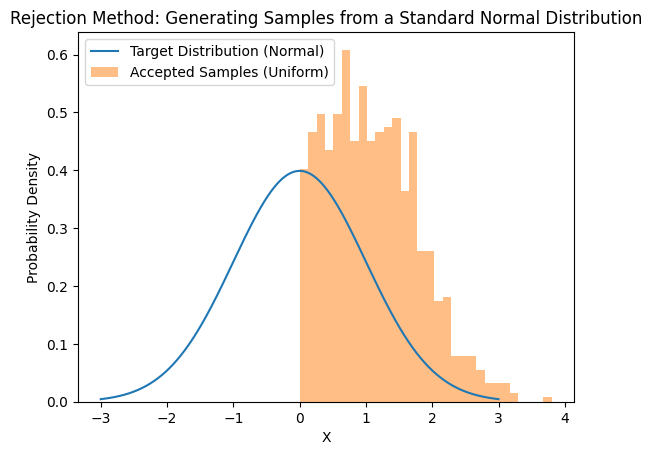

In [ ]:
# Question 2
import numpy as np
import matplotlib.pyplot as plt

# Target distribution (standard normal)
target_distribution = lambda x: np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

# Envelope distribution (uniform distribution in the range [0, 10])
envelope_distribution = lambda x: 1 / 10 if 0 <= x <= 10 else 0

# Rejection method
def rejection_method(sample_size):
    accepted_samples = []

    while len(accepted_samples) < sample_size:
        # Generate a random sample from the envelope distribution
        x_sample = np.random.uniform(0, 10)

        # Generate a random value from a uniform distribution
        u = np.random.uniform(0, 1)

        # Check acceptance condition
        if u * envelope_distribution(x_sample) <= target_distribution(x_sample):
            accepted_samples.append(x_sample)

    return accepted_samples

# Generate samples using the rejection method
sample_size = 1000
samples = rejection_method(sample_size)

# Plot the results
x_values = np.linspace(-3, 3, 1000)
plt.plot(x_values, target_distribution(x_values), label='Target Distribution (Normal)')
plt.hist(samples, bins=30, density=True, alpha=0.5, label='Accepted Samples (Uniform)')
plt.title('Rejection Method: Generating Samples from a Standard Normal Distribution')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


In [ ]:
# Bonus Question
import numpy as np

# Given parameters
sensitivity = 0.95  # Sensitivity of the test
specificity = 0.90  # Specificity of the test
prevalence = 0.01   # Prevalence of the disease

# Number of simulations
num_simulations = 1000

# Simulate test results for num_simulations individuals
true_positive = 0
false_positive = 0
true_negative = 0
false_negative = 0

for _ in range(num_simulations):
    # Simulate disease status (1 for disease, 0 for no disease)
    has_disease = np.random.choice([0, 1], p=[1 - prevalence, prevalence])

    # Simulate test result
    if has_disease:
        test_result = np.random.choice([0, 1], p=[1 - sensitivity, sensitivity])
    else:
        test_result = np.random.choice([0, 1], p=[specificity, 1 - specificity])

    # Update counts based on test results and true disease status
    if has_disease and test_result:
        true_positive += 1
    elif has_disease and not test_result:
        false_negative += 1
    elif not has_disease and test_result:
        false_positive += 1
    elif not has_disease and not test_result:
        true_negative += 1

# Calculate the probability of actually having the disease given a positive test result
probability_disease_given_positive = true_positive / (true_positive + false_positive)

print("Probability of actually having the disease given a positive test result:")
print(probability_disease_given_positive)


Probability of actually having the disease given a positive test result:
0.08333333333333333
